## Chapter 4

In [32]:
import sys
from importlib import reload
sys.path.append("..")

In [33]:
## INCLUDES
from sympy import *
init_printing(use_latex='mathjax')
s, w = symbols('s w', real=True)
import numpy as np
import matplotlib.pyplot as plt
import control 
import Ch3.utilities as ch3_utils
reload(ch3_utils)

<module 'Ch3.utilities' from '../Ch3/utilities.py'>

In [34]:
import Ch4.utilities as ch4_utils
reload(ch4_utils)

<module 'Ch4.utilities' from '../Ch4/utilities.py'>

### Problem 4.1
#### a)
The difference feedback rule can be used to compose the $\mathbf{\dot x} = A \mathbf{x} + B \mathbf{u}$ and $G$ blocks using a relationship from pg. 117, namely:

\begin{eqnarray}
H(s) = H_1(s)[I + H_2(s)H_1(s)]^{-1}.
\end{eqnarray}

$H_1(s) \equiv (sI-A)^{-1} B \triangleq \Phi(s) B$ comes from the state-space model and $H_2(s) \equiv G$.  It follows that the single-loop feedback transfer function $H(s)$ is

\begin{eqnarray}
H'(s) = \Phi(s) B[I + G \Phi(s) B]^{-1}.
\end{eqnarray}

Finally, use the tandem rule $H(s) = H_2(s) H_1(s)$, with $H_2(s) \equiv C$ and $H_1(s) \equiv H'(s)$ above to get the final reduced transfer function from $\mathbf{u_0}(s)$ to $\mathbf{y}(s)$:

\begin{eqnarray}
H(s) = C \Phi(s) B[I + G \Phi(s) B]^{-1}.
\end{eqnarray}

#### b)
If $z$ is a zero of the open-loop process $\Phi(s)B$, then $\det(\Phi(z)B) = 0$.  It follows that $\det(C \Phi(z) B) = \det(C) \det(\Phi(z)B) = 0$ _regardless of the matrices_ $C$ and $G$!  Therefore, $z$ must also be a zero of the closed-loop process.

A nicer approach to showing this equivalence via a generalized eigenvalue problem is shown [here](https://ocw.mit.edu/courses/aeronautics-and-astronautics/16-30-feedback-control-systems-fall-2010/lecture-notes/MIT16_30F10_lec08.pdf).  Basically, it can be shown that the closed-loop system is the same as the open-loop system up to some nonsingular transformation:
\begin{eqnarray}
T = \begin{pmatrix}
I & 0 \\
-G & I
\end{pmatrix}.
\end{eqnarray}

From this fact, it is clear that, if $z$ is a zero of the open-loop process (i.e. it is a singular value of the matrix resulting from the generalized eigenvalue problem) then it will be a zero of the closed-loop process because, again, it will be a singular value of the matrix arising from the generalized eigenvalue problem with state-feedback.

### Problem 4.2

#### a)

In [35]:
g = symbols('g', real=True)
A = Matrix([[-1.5, 0.5, 0], [0.5, -1, 0.5], [0, 0.5, -1.5]])
Phi = ch3_utils.computeResolvent(A)
C = Matrix([[0,0,1]])
B = Matrix([[1],[0],[0]])
E = Matrix([[0],[0],[1]])
H = g*C*Phi*B
Iden = eye(1)
H1 = simplify(H * (Iden + H)**-1)[0]
print('Transfer function H1 (input to v3) is')
pprint(H1)
H2 = simplify(C*Phi*E)[0]
print('Transfer function H2 (disturbance to v3) is')
pprint(H2)

Transfer function H1 (input to v3) is
                                    0.0833333333333333⋅g                      
──────────────────────────────────────────────────────────────────────────────
                                          3                     2             
0.0833333333333333⋅g + 0.333333333333333⋅s  + 1.33333333333333⋅s  + 1.58333333

              
──────────────
              
333333⋅s + 0.5
Transfer function H2 (disturbance to v3) is
     ⎛                   2                                          ⎞
 1.0⋅⎝0.333333333333333⋅s  + 0.833333333333333⋅s + 0.416666666666667⎠
─────────────────────────────────────────────────────────────────────
                   3                     2                           
0.333333333333333⋅s  + 1.33333333333333⋅s  + 1.58333333333333⋅s + 0.5


#### b)

In [36]:
# need to use Routh-Hurwitz here
n, d = fraction(H1)
pprint(d)
Dcoeffs = [0.0625, 0.25, 0.296875, 0.09375+0.015625*g]
dets = ch4_utils.hurwitz(Dcoeffs)
pprint(dets)

                                          3                     2             
0.0833333333333333⋅g + 0.333333333333333⋅s  + 1.33333333333333⋅s  + 1.58333333

              
333333⋅s + 0.5
⎡                               2                ⎤
⎣4.0, -0.25⋅g + 17.5, - 0.0625⋅g  + 4.0⋅g + 26.25⎦


The Hurwitz conditions (see above) are:
\begin{eqnarray}
4 &>& 0 \\
17.5 - 0.25 g &>& 0 \\
-0.0625g^2 + 4g + 26.25 &>& 0 
\end{eqnarray}
The first condition puts no constraints on g, the second requires $g < 70$, and the third requires a bit of work. By the quadratic equation, the two roots are $g = \frac{-4 \pm \sqrt{16 - 4*0.0625*26.25}}{-2*0.0625}$.  The final condition yields a concave-down parabolic equation in $g$, the roots of which are $\approx 24.576$ and $\approx 56.576$.  This condition is the most restrictive of the three, so conclude that $\approx 24.576 < g < \approx 56.576$ is the valid stability range for $g$.

Naively, it makes sense that driving the system with negative feedback would drive the system unstable, since the feedback would continue to drive the error larger and larger.

#### c)
The open loop transfer function is $C \Phi(s) B$.  The [Python Control Systems Library](https://python-control.readthedocs.io/en/latest/index.html) has functions to do frequency domain plots.

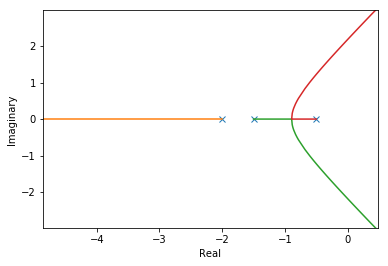

In [37]:
H = simplify(C * Phi * B)
n, d = fraction(H[0])
num = np.array([float(n)])
den = np.array([float(p) for p in poly(d).all_coeffs()])
G = control.TransferFunction(num, den)
control.root_locus(G, PrintGain=False)
plt.show()

#### d)

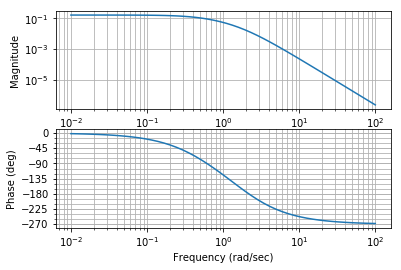

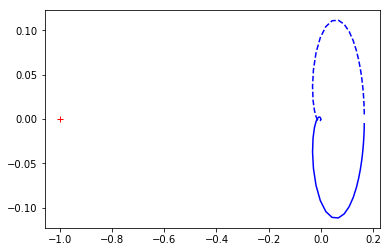

In [38]:
plt.figure()
control.bode_plot(G)
plt.figure()
control.nyquist_plot(G)
plt.show()

#### e)
Following signal flow around the loop yields the following error equation:
\begin{eqnarray}
e(s) (1 + g C \Phi(s) B) &=& u_r(s) - C \Phi(s) E v_0(s) \\
\implies e(s) = \frac{u_r(s) - C \Phi(s) E v_0(s)}{1 + g C \Phi(s) B}
\end{eqnarray}

The steady-state error is computed by the final-value theorem:
\begin{eqnarray}
e_{ss} &=& \lim_{s \to 0} s e(s)
&=& \lim_{s \to 0} \frac{s \bigl ( e_d(s) - s C \Phi(s) E v_0(s) \bigr )}{1 + g C \Phi(s) B}
\end{eqnarray}

### Problem 4.3

#### a)

In [39]:
h = symbols('h')
A = Matrix([[-1.5, 0.5, 0], [0.5, -1, 0.5], [0, 0.5, -1.5]])
Phi = ch3_utils.computeResolvent(A)
C = Matrix([[0,0,1]])
B = Matrix([[1],[0],[0]])
E = Matrix([[0],[0],[1]])
K = g + h/s
H = K*C*Phi*B
Iden = eye(1)
H1 = simplify(H * (Iden + H)**-1)[0]
#H2 = simplify(C*Phi*E)[0]
#print('Transfer function H2 (disturbance to v3) is')
#pprint(H2)

# need to use Routh-Hurwitz here
n, d = fraction(H1)
pprint(d)
Dcoeffs = [0.0625, 0.25, 0.296875, 0.09375+0.015625*g, 0.015625*h]
dets = ch4_utils.hurwitz(Dcoeffs)
pprint(dets)

                                                                     3        
0.0833333333333333⋅g⋅s + 0.0833333333333333⋅h + 0.333333333333333⋅s⋅s  + 1.333

               2                               
33333333333⋅s⋅s  + 1.58333333333333⋅s⋅s + 0.5⋅s
⎡                               2                            ⎛            2   
⎣4.0, -0.25⋅g + 17.5, - 0.0625⋅g  + 4.0⋅g - 4.0⋅h + 26.25, h⋅⎝- 0.015625⋅g  + 

                      ⎞⎤
1.0⋅g - 1.0⋅h + 6.5625⎠⎦


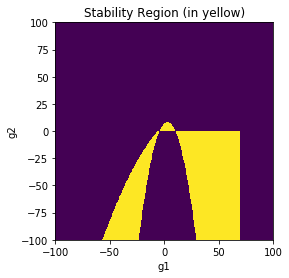

In [40]:
def f(g, h):
    c1 = (-0.25*g + 17.5 > 0)
    c2 = (-0.0625*g**2 + 4.*g - 4.*h + 26.25 > 0)
    c3 = (h*(-0.15625*g**2 + g - h + 6.5625) > 0)
    return int(c1 and c2 and c3)

vf = np.vectorize(f)
gs = np.linspace(-100, 100, 501)
hs = np.linspace(-100, 100, 501)
X = np.meshgrid(gs,hs)
out = vf(X[0], X[1])
plt.imshow(out, origin='lower', extent=(-100, 100, -100, 100))
plt.xlabel('g1')
plt.ylabel('g2')
plt.title('Stability Region (in yellow)')
plt.show()

The plot above shows a rough discretization of the stability region vs $g_1$ and $g_2$ using the Hurwitz criteria.

#### b)

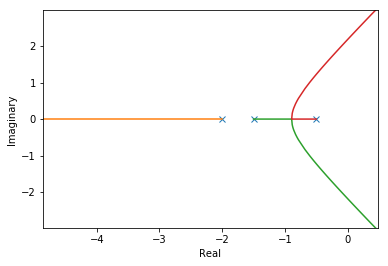

In [43]:
H = simplify(C * Phi * B)[0]
PInoGain = 1. + 1./s
A = np.array([[-1.5, 0.5, 0], [0.5, -1, 0.5], [0, 0.5, -1.5]])
C = np.array([[0,0,1]]).astype('float')
B = np.array([[1],[0],[0]]).astype('float')
D = np.zeros((1, 1))
plantSS = control.StateSpace(A, B, C, D)
plantTF = control.ss2tf(plantSS)
PItf = control.TransferFunction(np.array([1]), np.array([1])) + control.TransferFunction(np.array([1]), np.array([0, 1]))
G = PItf * plantTF
control.root_locus(G, PrintGain=False)
plt.show()

#### c)

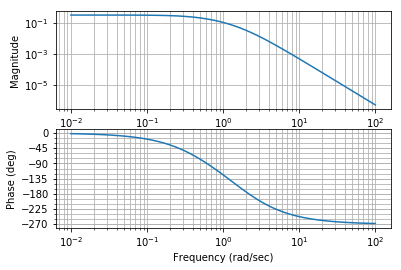

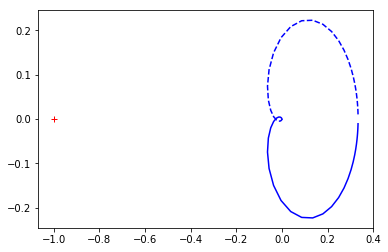

In [44]:
plt.figure()
control.bode_plot(G)
plt.figure()
control.nyquist_plot(G)
plt.show()

### Problem 4.4
#### a)
\begin{eqnarray}
A &=& \begin{pmatrix}
-0.746 & 0.006 & 0.001 & 0.0369 \\
-12.9 & -0.746 & 0.387 & 0 \\
4.31 & 0.024 & -0.0174 & 0 \\
0 & 1 & 0 & 0 \\
\end{pmatrix}, \\
B &=& \begin{pmatrix}
0.0012 & 0.0092 \\
6.05 & 0.952 \\
-0.416 & -1.76 \\
0 & 0
\end{pmatrix}
\end{eqnarray}

#### b)

In [45]:
A = np.array([[-.746, .006, .001, .0369], [-12.9, -.746, .387, 0], [4.31, .024, -.0174, 0], [0, 1, 0, 0]])
lam, v = np.linalg.eig(A)
pprint(lam)

[-1.31182557+0.j         -0.14760023+0.62779697j -0.14760023-0.62779697j
                         0.09762603+0.j        ]                        


The dutch roll mode is described by $s=-0.1477 \pm 0.6278j$.  The roll subsidence mode is described by $s = -1.3118$.  The spiral mode is described by $s = 0.0976$.

#### c)

In [48]:
A = Matrix([[-.746, .006, .001, .0369], [-12.9, -.746, .387, 0], [4.31, .024, -.0174, 0], [0, 1, 0, 0]])
Phi = ch3_utils.computeResolvent(A)
# p(s) / deltaA(s)
C = Matrix([[0, 1, 0, 0]])
B = Matrix([[.0012],[6.05],[-.416],[0]])
H = simplify(C*Phi*B)[0]
print('Transfer function p(s) / deltaA(s)')
pprint(H)
n, d = fraction(H)
num = np.array([float(p) for p in poly(n).all_coeffs()])
den = np.array([float(p) for p in poly(d).all_coeffs()])
G = control.TransferFunction(num, den)
print('    -Zeros: {}'.format(G.zero()))
print('    -Poles: {}'.format(G.pole()))
print('')
# r(s) / deltaA(s)
C = Matrix([[0, 0, 1, 0]])
H = simplify(C*Phi*B)[0]
print('Transfer function r(s) / deltaA(s)')
pprint(H)
n, d = fraction(H)
num = np.array([float(p) for p in poly(n).all_coeffs()])
den = np.array([float(p) for p in poly(d).all_coeffs()])
G = control.TransferFunction(num, den)
print('    -Zeros: {}'.format(G.zero()))
print('    -Poles: {}'.format(G.pole()))
print('')
# p(s) / deltaR(s)
C = Matrix([[0, 1, 0, 0]])
B = Matrix([[.0092],[0.952],[-1.76],[0]])
H = simplify(C*Phi*B)[0]
print('Transfer function p(s) / deltaR(s)')
pprint(H)
n, d = fraction(H)
num = np.array([float(p) for p in poly(n).all_coeffs()])
den = np.array([float(p) for p in poly(d).all_coeffs()])
G = control.TransferFunction(num, den)
print('    -Zeros: {}'.format(G.zero()))
print('    -Poles: {}'.format(G.pole()))
print('')# r(s) / deltaR(s)
C = Matrix([[0, 0, 1, 0]])
H = simplify(C*Phi*B)[0]
print('Transfer function r(s) / deltaR(s)')
pprint(H)
n, d = fraction(H)
num = np.array([float(p) for p in poly(n).all_coeffs()])
den = np.array([float(p) for p in poly(d).all_coeffs()])
G = control.TransferFunction(num, den)
print('    -Zeros: {}'.format(G.zero()))
print('    -Poles: {}'.format(G.pole()))
print('')

Transfer function p(s) / deltaA(s)
                 ⎛                  2                                         
               s⋅⎝4.00821518484166⋅s  + 2.94295614151318⋅s - 0.040112296276666
──────────────────────────────────────────────────────────────────────────────
                   4        3                      2                          
0.662514906585398⋅s  + 1.0⋅s  + 0.428169338810123⋅s  + 0.309525513714059⋅s - 0

 ⎞               
2⎠               
─────────────────
                 
.0352892003445077
    -Zeros: [-0.74761697  0.01338589  0.        ]
    -Poles: [-1.31182557+0.j         -0.14760023+0.62779697j -0.14760023-0.62779697j
  0.09762603+0.j        ]

Transfer function r(s) / deltaA(s)
                         4                      3                       2     
    - 0.297674418604651⋅s  - 0.303219749552773⋅s  + 0.0409134211091232⋅s  + 0.
──────────────────────────────────────────────────────────────────────────────
                   5        4                

After computing the zeros and poles for each transfer function, it's clear that the pole-zero combinations for $p(s) / \delta_A(s)$ and $r(s) / \delta_R(s)$ are more amenable for control than the other pair; it requires less movement for pole-zero cancellation.

#### d)
I'd need to find an $s_0$ such that the rank of $H(s)$ is reduced when $s=s_0$.  I can't think of a way to do this easily, so I'll just sketch out an approach.

The rank of the resulting transfer matrix $H(s)$, which has all input-output transfer functions represented as $(i, j)$ entries in the matrix ($i$ corresponds to system output, $j$ to input).  The resulting $H(s)$ is $4 \times 2$, so it has rank 2 _at most_.  I would try and find $s_0$ such that the two columns of $H(s)$ are linearly dependent.  Whenever this condition was met, $s_0$ would be a transmission zero for the process.

I'd find the $4 \times 2$ matrix $H(s)$ via the following cell.  I'd first factor out a common denominator and then I'd look at the resulting scaled matrix.  I would then row-reduce the transpose of that matrix to row-reduced echelon form and then solve for $s_0$ that would turn a row into a linear combination of the others.

In [49]:
numOutputs = 4
numInputs = 2
for i in range(numOutputs):
    C = zeros(1,4)
    C[i] = 1.
    nc = []
    dc = []
    for j in range(numInputs):
        if j == 0:
            B = Matrix([[.0012],[6.05],[-.416],[0]])
        else:
            B = Matrix([[.0092],[0.952],[-1.76],[0]])
        H = simplify(C*Phi*B)[0]
        print('H({}, {})'.format(i,j))
        pprint(H)
        print('')
        

H(0, 0)
        ⎛                      8                       7                      
    1.0⋅⎝0.000568885787407855⋅s  + 0.0182408866274625⋅s  + 0.130251581209987⋅s
──────────────────────────────────────────────────────────────────────────────
                   9                     8                     7              
0.474071489506546⋅s  + 1.37807841284658⋅s  + 1.53269315035438⋅s  + 1.178448994

6                      5                       4                       3      
  + 0.155153309249951⋅s  + 0.0558774649271001⋅s  + 0.0393957508638441⋅s  - 0.0
──────────────────────────────────────────────────────────────────────────────
       6                     5                     4                       3  
20566⋅s  + 0.66305902052578⋅s  + 0.11872827480869⋅s  + 0.0473332659022544⋅s  -

                 2                                               ⎞   
114264117146682⋅s  + 0.000732296736037176⋅s - 5.80996009352629e-6⎠   
────────────────────────────────────────────────────────────

### Problem 4.5
#### a)

In [50]:
A = np.array([[0, -14, 0, 0], [0, -1, 1, 0], [0, -5, -.5, 0], [0, 0, 1, 0]])
B = np.array([[-1], [-.1], [-9], [0]])
C = np.eye(4)
D = np.zeros((4,1))
sys = control.StateSpace(A, B, C, D)
pprint(sys.pole())

[ 0.  +0.j         0.  +0.j        -0.75+2.2220486j -0.75-2.2220486j]


The open-loop poles are $s=0$, with multiplicity 2, and a complex conjugate pair $s = -0.75 \pm 2.222 i$.

#### b)

In [51]:
# from deltaE to theta
C = Matrix([[0, 0, 0, 1]])
H1 = simplify(C*Phi*B)
print('theta(s) / deltaE(s):')
pprint(H1)
print('')
# from deltaE to deltau
C = Matrix([[1, 0, 0, 0]])
H2 = simplify(C*Phi*B)
print('deltau(s) / deltaE(s):')
pprint(H2)
print('')

theta(s) / deltaE(s):
⎡                                      2                                      
⎢                - 0.0662514906585398⋅s  + 6.18832648734597⋅s - 2.601427746124
⎢─────────────────────────────────────────────────────────────────────────────
⎢                   4        3                      2                         
⎣0.662514906585398⋅s  + 1.0⋅s  + 0.428169338810123⋅s  + 0.309525513714059⋅s - 

                  ⎤
29                ⎥
──────────────────⎥
                  ⎥
0.0352892003445077⎦

deltau(s) / deltaE(s):
⎡                             8                     7                      6  
⎢        - 0.474071489506546⋅s  - 1.02897216797396⋅s  - 0.755030754202703⋅s  -
⎢─────────────────────────────────────────────────────────────────────────────
⎢                   9                     8                     7             
⎣0.474071489506546⋅s  + 1.37807841284658⋅s  + 1.53269315035438⋅s  + 1.17844899

                    5                      4                  

### Problem 4.6


In [52]:
K1, K2, K3 = symbols('K1 K2 K3')
Dcoeffs = [1.0, 36.32+3.04*K1, 182.4+110.4*K1, 554.5*K1 - 206.2*K2, -613.9*K1*K2]  # typo in book, 36.62 vs. 36.32
dets = ch4_utils.hurwitz(Dcoeffs)
pprint(dets)

⎡                           2                                                 
⎣3.04⋅K₁ + 36.32, 335.616⋅K₁  + 4009.724⋅K₁ + 206.2⋅K₂ + 6624.768, 613.9⋅K₁⋅K₂

                  2                                                           
⋅(3.04⋅K₁ + 36.32)  + (3.04⋅K₁ + 36.32)⋅(110.4⋅K₁ + 182.4)⋅(554.5⋅K₁ - 206.2⋅K

                          2        ⎛                   3                      
₂) - (554.5⋅K₁ - 206.2⋅K₂) , K₁⋅K₂⋅⎝- 3482911.457536⋅K₁ ⋅K₂ - 114246220.3008⋅K

 3                     2                        2                             
₁  - 40738905.335296⋅K₁ ⋅K₂ - 1364940323.0162⋅K₁  - 59765823.5307839⋅K₁⋅K₂ - 2

                                   2                     ⎞⎤
255121044.1984⋅K₁ + 26102070.316⋅K₂  + 838604074.50624⋅K₂⎠⎦


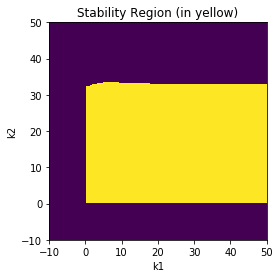

In [53]:
def f(k1, k2):
    c1 = 3.04*k1 + 36.32 > 0
    c2 = 335.616*k1**2 + 4009.724*k1 + 206.2*k2 + 6624.768 > 0
    c3 = 613.9*k1*k2*(3.04*k1 + 36.32)**2 + (3.04*k1 + 36.32)*(110.4*k1 + 182.4)*(554.5*k1 - 206.2*k2) - (554.5*k1-206.2*k2)**2 > 0
    c4 = k1*k2*(-3482911.457536 * k1**3 * k2 - 114246220.3008 * k1**3 - 40738905.335296 * k1**2 * k2 - 1364940323.0162 * k1**2 - 59765823.5307839 * k1 * k2 - 2255121044.1984 * k1 + 26102070.316 * k2**2 + 838604074.50624 * k2) > 0
    return int(c1 and c2 and c3 and c4)

vf = np.vectorize(f)
gs = np.linspace(-10, 50, 301)
hs = np.linspace(-10, 50, 301)
X = np.meshgrid(gs,hs)
out = vf(X[0], -X[1])
plt.imshow(out, origin='lower', extent=(-10, 50, -10, 50))
plt.xlabel('k1')
plt.ylabel('k2')
plt.title('Stability Region (in yellow)')
plt.show()

The stability region above is larger than the one predicted by the book; the $K_1$ term appears to continue on past $50$.  The $K_2$ term looks about right though, and the Hurwitz matrix (minus the typos) matches the book's.

### Problem 4.7
#### a)

In [54]:
A = np.array([[0, -.00156, -.0711, 0, 0], [0, -.1419, .0711, 0, 0], [0, -.00875, -1.102, 0, 0], [0, -.00128, -.1489, 0, -.0013], [0, .0605, .1489, 0, -.0591]])
B = np.array([[0, -.143, 0], [0, 0, 0], [.392, 0, 0], [0, .108, -.0592], [0, -.0486, 0]])
C = np.eye(5)
D = np.zeros((5,3))
E = np.array([[.2174, 0, 0], [-.074, .1434, 0], [-.036, 0, 0.1814], [0, 0, 0], [0, 0, 0]])

sys = control.StateSpace(A, B, C, D)
pprint(sys.pole())

[ 0.          0.         -0.0591     -0.14254842 -1.10135158]


The open-loop poles are $s=0$, with multiplicity 2, $s=-0.0591$, $s=-0.1425$, and $s=-1.1014$.  All poles are real and negative $\implies$ stability.

#### b)

In [56]:
A = Matrix([[0, -.00156, -.0711, 0, 0], [0, -.1419, .0711, 0, 0], [0, -.00875, -1.102, 0, 0], [0, -.00128, -.1489, 0, -.0013], [0, .0605, .1489, 0, -.0591]])
B = Matrix([[0, -.143, 0], [0, 0, 0], [.392, 0, 0], [0, .108, -.0592], [0, -.0486, 0]])
Phi = ch3_utils.computeResolvent(A)
obs = Matrix([[1, 0, 0, 0, 0], [0, 0, 0, 1, 0]])
print('Observation Matrix:')
pprint(obs)
print('\n\n')

C = Matrix([[1, 0, 0, 0, 0]])

print('x1(s) / u1(s)')
B = Matrix([[0], [0], [.392], [0], [0]])
pprint(simplify(C*Phi*B)[0])
print('\n\n')
print('x1(s) / u2(s)')
B = Matrix([[-.143], [0], [0], [.108], [-.0486]])
pprint(simplify(C*Phi*B)[0])
print('\n\n')
print('x1(s) / u3(s)')
print('\n\n')
B = Matrix([[0], [0], [0], [-.0592], [0]])
pprint(simplify(C*Phi*B)[0])
print('\n\n\n\n')

C = Matrix([[0, 0, 0, 1, 0]])

print('x4(s) / u1(s)')
B = Matrix([[0], [0], [.392], [0], [0]])
pprint(simplify(C*Phi*B)[0])
print('x4(s) / u2(s)')
print('\n\n')
B = Matrix([[-.143], [0], [0], [.108], [-.0486]])
pprint(simplify(C*Phi*B)[0])
print('\n\n')
print('x4(s) / u3(s)')
print('\n\n')
B = Matrix([[0], [0], [0], [-.0592], [0]])
pprint(simplify(C*Phi*B)[0])
print('\n\n')

Observation Matrix:
⎡1  0  0  0  0⎤
⎢             ⎥
⎣0  0  0  1  0⎦



x1(s) / u1(s)
 ⎛                      2                                             ⎞ 
-⎝3.46944695195361e-18⋅s  + 0.0224063027574564⋅s + 0.00321440819358469⎠ 
────────────────────────────────────────────────────────────────────────
            ⎛                   2                            ⎞          
          s⋅⎝0.803923144947343⋅s  + 1.0⋅s + 0.126212657769917⎠          



x1(s) / u2(s)
-0.143 
───────
   s   



x1(s) / u3(s)



0





x4(s) / u1(s)
    ⎛                      5                       4                       3  
1.0⋅⎝3.46944695195361e-18⋅s  - 0.0229175860850446⋅s  - 0.0331574202740587⋅s  -
──────────────────────────────────────────────────────────────────────────────
              ⎛                   5        4                      3           
            s⋅⎝0.392634182731949⋅s  + 1.0⋅s  + 0.788530385959402⋅s  + 0.196543

                      2                                               ⎞


### Problem 4.8
#### a)

In [58]:
A = Matrix([[0, -.00156, -.0711, 0.143*K2, 0], [0, -.1419, .0711, 0, 0], [-.392*K1, -.00875, -1.102, 0, 0], [0, -.00128, -.1489, -.108*K2, -.0013], [0, .0605, .1489, .0486*K1, -.0591]])
B = Matrix([[0, -.143*K2, 0], [0, 0, 0], [.392*K1, 0, 0], [0, .108*K2, -.0592], [0, -.0486*K2, 0]])
C = Matrix([[1, 0, 0, 0, 0]])
res = ch3_utils.computeResolvent(A, imag=False, smplfy=False)
M = simplify(C*res*B)[0]
C = Matrix([[0, 0, 0, 1, 0]])
n, d = fraction(M)
denCoeffs = [-1.44471785472e-8, 
             -1.5602952830976e-9*K2 - 1.88246736470016e-8, 
             -3.33022512249417e-9 - 2.03306475387617e-9*K2 + 4.01747429984109e-10*K1,
             2.01948391736579e-28 * K1**2 + 1.6407412184584e-10 * K1 * K2 + 8.0427452651872e-11 * K1 - 1.34047556235777e-10,
             2.54400716081478e-14 * K1**2 + 3.32772044714127e-11 * K1 * K2 + 3.27064729083152e-12 * K1 - 1.44771360734639e-11 * K2,
             3.64963267290489e-15 * K1**2 + 1.41111171520274e-12 * K1 * K2
            ]

In [59]:
pprint(denCoeffs)
dets = ch4_utils.hurwitz(denCoeffs)
pprint(dets)

⎡                                                                             
⎣-1.44471785472e-08, -1.5602952830976e-9⋅K₂ - 1.88246736470016e-8, 4.017474299

                                                                              
84109e-10⋅K₁ - 2.03306475387617e-9⋅K₂ - 3.33022512249417e-9, 2.01948391736579e

      2                                                                       
-28⋅K₁  + 1.6407412184584e-10⋅K₁⋅K₂ + 8.0427452651872e-11⋅K₁ - 1.3404755623577

                              2                                               
7e-10, 2.54400716081478e-14⋅K₁  + 3.32772044714127e-11⋅K₁⋅K₂ + 3.2706472908315

                                                           2                  
2e-12⋅K₁ - 1.44771360734639e-11⋅K₂, 3.64963267290489e-15⋅K₁  + 1.4111117152027

           ⎤
4e-12⋅K₁⋅K₂⎦
⎡                                         2                                   
⎣0.108⋅K₂ + 1.303, 1.39783966174986e-20⋅K₁  + 0.00835356183999998⋅K₁⋅K₂ - 0.03

                    

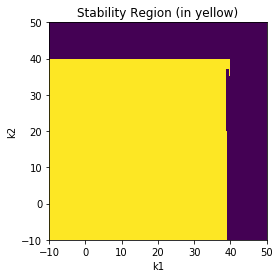

In [60]:
def f(k1, k2):
    c1 = 0.108*k2 + 1.303 > 0
    c2 = 1.398e-20*k1**2 + 8.3536e-3*k1*k2 -3.067e-2*k1 + 1.520e-2*k2**2 + .2083*k2 + .2911 > 0
    c3 = -1.954e-40*k1**4 - 2.7552e-22*k1**3*k2 + 3.509e-22*k1**3 - 9.485e-5*k1**2*k2**2 + 3.022e-4*k1**2*k2 + 1.734e-4*k1**2 - 1.457e-4*k1*k2**3 - 1.809e-3*k1*k2**2 - 5.404e-4*k1*k2 - 1.521e-3*k1 - 1.169e-5*k2**3 - 1.4101e-4*k2**2 + 2.310e-4*k2 + 2.701e-3 > 0
    c4 = 3.441e-46*k1**6 + 4.852e-28*k1**5*k2 - 7.160e-28*k1**5 + 1.6702e-10*k1**4*k2**2 - 5.909e-10*k1**4*k2 - 8.936e-11*k1**4 + 2.187e-7*k1**3*k2**3 - 6.939e-7*k1**3*k2**2 - 3.847e-7*k1**3*k2 - 4.033e-8*k1**3 + 3.357e-7*k1**2*k2**4 + 4.204e-6*k1**2*k2**3 + 1.453e-6*k1**2*k2**2 + 2.368e-6*k1**2*k2 + 3.564e-7*k1**2 + 8.978e-8*k1*k2**4 + 1.708e-6*k1*k2**3 + 7.521e-6*k1*k2**2 - 1.243e-6*k1*k2 - 6.114e-7*k1 - 1.171e-8*k2**4 - 1.413e-7*k2**3 + 2.3147e-7*k2**2 + 2.706e-6*k2 > 0
    c5 = k1*(-8.692e-53*k1**7 - 1.226e-34*k1**6*k2 + 1.809e-34*k1**6 - 4.219e-17*k1**5*k2**2 + 1.493e-16*k1**5*k2 + 2.258e-17*k1**5 - 7.157e-14*k1**4*k2**3 + 2.330e-13*k1**4*k2**2 + 1.059e-13*k1**4*k2 + 1.0188e-14*k1**4 - 2.145e-11*k1**3*k2**4 + 6.672e-11*k1**3*k2**3 + 3.721e-11*k1**3*k2**2 + 3.341e-12*k1**3*k2 - 9.003e-14*k1**3 - 3.279e-11*k1**2*k2**5 - 4.106e-10*k1**2*k2**4 - 1.423e-10*k1**2*k2**3 - 2.332e-10*k1**2*k2**2 - 3.450e-11*k1**2*k2 + 1.545e-13*k1**2 - 8.769e-12*k1*k2**5 - 1.667e-10*k1*k2**4 - 7.345e-10*k1*k2**3 + 1.214e-10*k1*k2**2 + 5.904e-11*k1*k2 + 1.44e-12*k2**5 + 1.380e-11*k2**4 - 2.261e-11*k2**3 - 2.643e-10*k2**2) > 0
    return int(c1 and c2 and c3 and c4 and c5)

vf = np.vectorize(f)
gs = np.linspace(-25, 5, 301)
hs = np.linspace(-25, 5, 301)
X = np.meshgrid(gs,hs)
out = vf(X[0], -X[1])
plt.imshow(out, origin='lower', extent=(-10, 50, -10, 50))
plt.xlabel('k1')
plt.ylabel('k2')
plt.title('Stability Region (in yellow)')
plt.show()

#### b) and c)

In [62]:
A = Matrix([[0, -.00156, -.0711, 0, 0], [0, -.1419, .0711, 0, 0], [0, -.00875, -1.102, 0, 0], [0, -.00128, -.1489, 0, -.0013], [0, .0605, .1489, 0, -.0591]])
B = Matrix([[0, -.143, 0], [0, 0, 0], [.392, 0, 0], [0, .108, -.0592], [0, -.0486, 0]])
# compute resolvent with complex frequency
Phi = ch3_utils.computeResolvent(A, imag=True, smplfy=False)

C = Matrix([[40., 0, 0, 0, 0]])
B = Matrix([[0], [0], [.392], [0], [0]])
H11 = simplify(C*Phi*B)[0]
C = Matrix([[-40., 0, 0, 0, 0]])
B = Matrix([[-.143], [0], [0], [.108], [-.0486]])
H12 = simplify(C*Phi*B)[0]

C = Matrix([[0, 0, 0, 40, 0]])
B = Matrix([[0], [0], [.392], [0], [0]])
H21 = simplify(C*Phi*B)[0]
C = Matrix([[0, 0, 0, -40, 0]])
B = Matrix([[-.143], [0], [0], [.108], [-.0486]])
H22 = simplify(C*Phi*B)[0]

IplusH = Matrix([[1+H11, H12], [H21, 1+H22]])

# compute product of (I+H)* times (I+H) - (I+H)* is the conjugate transpose
product = Matrix([[simplify(conjugate(1+H11)*(1+H11)) + simplify(conjugate(H21)*H21), simplify(conjugate(1+H11)*H12) + simplify(conjugate(H21)*(1+H22))],
                  [simplify(conjugate(H12)*(1+H11)) + simplify(conjugate(1+H22)*H21), simplify(conjugate(H12)*H12) + simplify(conjugate(1+H22)*(1+H22))]])


# compute determinant of (\lambda*I - product) in terms of w - the roots of this are the singular values
sigma = symbols('sigma', real=True)
charPoly = simplify(det(sigma*eye(2) - product))
pprint(charPoly)

 ⎛⎛                                          ⎛     2                          
 ⎜⎜    ⎛       2                           ⎞ ⎜    _             _             
-⎝⎝1.0⋅⎝- 1.0⋅w  + 1.2439⋅ⅈ⋅w + 0.156995925⎠⋅⎝1.0⋅w  + 1.2439⋅ⅈ⋅w - 0.15699592
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              
                                                                              
                                                                              

 ⎞                                                                            
 ⎟ ⎛              4                    3                         2            
5⎠⋅⎝0.02042908⋅ⅈ⋅w  + 0.0295570217936⋅w  - 0.0085402054308382⋅ⅈ⋅w  - 0.0008704
──────────────────────────────────────────────────────────────────────────────
                                                   

I am not going to work through the remainder of this problem because the algebraic form above looks very nasty.  If I could reduce all of the terms, I would compute the singular values using the characteristic polynomial of $|\lambda I-M|$ as a function of $\omega$.  Also, a call to the matlab routine [`sigma`](https://www.mathworks.com/help/control/ref/sigma.html) would easily solve the problem given the transfer function $I + GH$.

### Problem 4.9

The characteristic equation comes from the denominator of $G(s)$, where
\begin{eqnarray}
G(s) = \frac{KH(s)}{1+KH(s)}
\end{eqnarray}

In [63]:
K = symbols('K')
H = 100980 / (s*(s**3+140.2*s**2+10.449*s+100980))
G = K*H / (1+K*H)
pprint(simplify(G))

                    100980⋅K                    
────────────────────────────────────────────────
             ⎛ 3          2                    ⎞
100980⋅K + s⋅⎝s  + 140.2⋅s  + 10.449⋅s + 100980⎠


In [64]:
dets = ch4_utils.hurwitz([1., 140.2, 10.449,100980, 100980*K])
pprint(dets)

[140.2, -99515.0502, -1984866919.2⋅K - 10049029769.196, -K⋅(200431861500816.0⋅
K + 1.01475102609341e+15)]


The Hurwitz criteria cannot be met for all $K$ because there will always be a negative determinant in the Hurwitz process independent of $K$.

### Problem 4.10

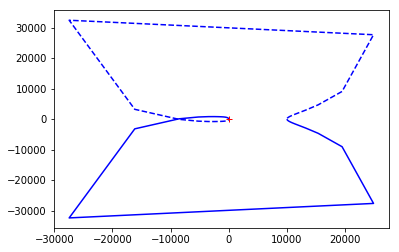

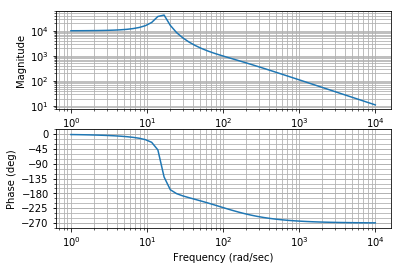

In [65]:
num = -1115.*np.array([1., 0., -2228.])
#to get the denom, uncomment the next two lines
#d = expand((0.01*s+1.)*(s**2 + 3.33*s+248.))
#pprint(d)
den = np.array([.01, 1.0333, 5.81, 248.])
G = control.TransferFunction(num, den)
plt.figure()
control.nyquist_plot(G)
plt.figure()
control.bode_plot(G)
plt.show()

### Problem 4.11

Using the feedback law $u = K_1(a_{NC} - Z_\alpha \alpha - Z_\delta \delta) - K_2q$, the closed loop system is:

\begin{eqnarray}
A &=& \begin{pmatrix}
\frac{Z_\alpha}{V} & 1 & \frac{Z_\delta}{V} \\
M_\alpha & 0 & M_\delta \\
-\frac{K_1 Z_\alpha}{\tau} & -\frac{K_2}{\tau} & -\frac{K_1 Z_\delta}{\tau} \\
\end{pmatrix}, \\
B &=& \begin{pmatrix}
0 \\
0 \\
\frac{K_1}{\tau}
\end{pmatrix}, \\
C &=& \begin{pmatrix}
Z_\alpha & 0 & Z_\delta
\end{pmatrix}
\end{eqnarray}


In [67]:
V = 1253.
Za = -4170.
Zd = -1115.
Ma = -248.
Md = -662.
tau = .01
A = Matrix([[-3.33, 1., -0.89], [-248., 0., -662.], [417000.*K1, -100.*K2, 111500.*K1]])
pprint(A)
B = Matrix([[0.], [0.], [100.*K1]])
C = Matrix([[-4170., 0., -1115.]])
Phi = ch3_utils.computeResolvent(A, imag=False, smplfy=False)
pprint(C*B)
H = simplify(C*Phi*B)[0]
pprint(H)

⎡   -3.33        1.0        -0.89   ⎤
⎢                                   ⎥
⎢  -248.0        0.0       -662.0   ⎥
⎢                                   ⎥
⎣417000.0⋅K₁  -100.0⋅K₂  111500.0⋅K₁⎦
[-111500.0⋅K₁]
           100.0⋅K₁⋅(2484020.0⋅s⋅(s + 3.33) - 4170.0⋅s⋅(662.0⋅s + 1983.74) + 6
──────────────────────────────────────────────────────────────────────────────
(248402000.0⋅K₁ + 248.0⋅s)⋅(s⋅(s + 3.33) + 248.0) - (662.0⋅s + 1983.74)⋅(41700

16036960.0)           
──────────────────────
0.0⋅K₁⋅s + 24800.0⋅K₂)


In [68]:
d = expand((24802000.*K1 + 248.*s)*(s*(s+3.33) + 248.0) - (662.*s + 1983.74)*(417000.*K1*s+24800.*K2))
pprint(d)

                  2                                                           
- 251252000.0⋅K₁⋅s  - 744628920.0⋅K₁⋅s + 6150896000.0⋅K₁ - 16417600.0⋅K₂⋅s - 4

                      3           2            
9196752.0⋅K₂ + 248.0⋅s  + 825.84⋅s  + 61504.0⋅s


In [69]:
coeffs = [248., 825.84 - 251252000.*K1, 61504. - 744628920.*K1 - 16417600.*K2+61504., -49196752.*K2 + 6150896000.*K1]
dets = ch4_utils.hurwitz(coeffs)
pprint(dets)

⎡                                                2                            
⎣-1013112.90322581⋅K₁ + 3.33, 3041907931318.94⋅K₁  + 67068074193.5484⋅K₁⋅K₂ - 

                                                                              
537304444.772581⋅K₁ - 22072.0⋅K₂ + 1651.68, (24802000.0⋅K₁ - 198374.0⋅K₂)⋅(-24

                                                                              
802000.0⋅K₁ + 198374.0⋅K₂ + (1013112.90322581⋅K₁ - 3.33)⋅(3002535.96774194⋅K₁ 

                      ⎤
+ 66200.0⋅K₂ - 496.0))⎦


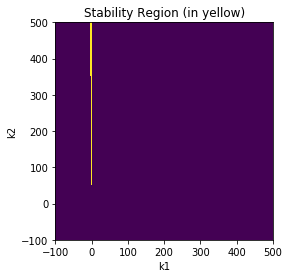

In [70]:
def f(k1, k2):
    c1 = -1013112.903*k1 + 3.33 > 0
    c2 = 3041907931318.94*k1**2 + 67068074193.5484*k1*k2 - 537304444.773*k1 - 22072.*k2 + 1651.68 > 0
    c3 = (24802000.*k1 - 198374.*k2)*(-24802000.*k1 + 198374.*k2 + (1013112.903*k1 - 3.33)*(3002535.968*k1 + 66200.*k2 - 496.)) > 0
    return int(c1 and c2 and c3)

vf = np.vectorize(f)
gs = np.linspace(-100, 500, 501)
hs = np.linspace(-100, 500, 501)
X = np.meshgrid(gs,hs)
out = vf(X[0], -X[1])
plt.imshow(out, origin='lower', extent=(-100, 500, -100, 500))
plt.xlabel('k1')
plt.ylabel('k2')
plt.title('Stability Region (in yellow)')
plt.show()

#### b)
It's a little tough to tell from the plot, but it looks like the system cannot be made stable when $K_2$ is 0; i.e. when the feedback uses $\alpha$ and $\delta$ alone.  Only when $K_2$ is increased to around $50$ can the system be made stable.  Moreover, the range of stable $K_1$ (i.e. gain margin) increases with increasing $K_2$.  These two facts make it easy to justify the additional cost of a rate gyro.